In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r'C:\Users\hp\Downloads\eda mini project\fifa.csv')

In [5]:
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:

data = data.drop(columns=['Photo','Flag','Club Logo','Jersey Number'])

In [7]:
data.shape

(18207, 56)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Position                    18147 non-null object
Joined                      16654 non-null object
Loaned From                 1264 non-null 

In [9]:
nd = data.isnull().sum()/len(data)*100
nd    

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys                      0.263635
Dribbling   

In [10]:
data['Value']

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18207, dtype: object

In [11]:
data['Value']=data['Value'].str.replace('€','' )

In [12]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return 0.0
    data['Value'] = data['Value'] .apply(value_to_float(data['Value']))

In [13]:
type(data['Value'])

pandas.core.series.Series

### converting M to its corresponding digit value and K to its corresponding digit value

In [14]:
data.Value = (data.Value.replace(r'[KM]+$', '', regex=True).astype(float) * \
   ....:           data.Value.str.extract(r'[\d\.]+([KM]+)', expand=False)
   ....:             .fillna(1)
   ....:             .replace(['K','M'], [10**3, 10**6]).astype(int))

In [15]:
data['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [16]:
data['Value'] = data['Value'].astype('float')

In [17]:
data['Wage'].describe()

count     18207
unique      144
top         €1K
freq       4900
Name: Wage, dtype: object

In [18]:
data['Wage']

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

##  cleaninig wage column

In [19]:
def clean_func(x):
    x = str(x)
    if '€' in x:
        x = x.replace('€','')
    if "M" in x:
        m = 10 ** 6
        x = x.replace('M','')
        x = str(float(x) * m)
    if "K" in x:
        k = 10 ** 3
        x = x.replace('K','')
        x = str(float(x)*k)
    return x
    
# print(df_drop1['Release Clause'].tail(20))
data['Wage'] = data['Wage'].apply(clean_func)
data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: object

In [20]:
data['Wage'] = data['Wage'].astype('float')


In [21]:
data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

Convert to int with only year

In [22]:
data['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

In [23]:
data['Joined'] .describe()  

count           16654
unique           1736
top       Jul 1, 2018
freq             1538
Name: Joined, dtype: object

In [24]:
data['Joined'].isnull().sum()/len(data)*100  #### only 8.5% percent are missing values we can drop it

8.529686384357664

In [25]:
data['Joined'].dropna(inplace = True)

In [26]:
data['Joined'] =data['Joined'].transform(lambda x:str(x)[-4:])

In [27]:
data['Joined']


0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: object

In [28]:
data['Joined']  = data['Joined'].astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

##  'Contract Valid Until' 	Convert to datetime type

In [32]:
data['Contract Valid Until'] .describe()

count     17918
unique       36
top        2019
freq       4819
Name: Contract Valid Until, dtype: object

In [33]:
data['Contract Valid Until'].isnull().sum()/len(data)*100

1.5873015873015872

In [34]:
data['Contract Valid Until'].describe()

count     17918
unique       36
top        2019
freq       4819
Name: Contract Valid Until, dtype: object

In [35]:
##data['Contract Valid Until'] = data['Contract Valid Until'] .apply(lambda x: str(x)[:11])

In [36]:
data['Contract Valid Until'] = pd. to_datetime(data['Contract Valid Until'])

In [37]:
data['Contract Valid Until'] = data['Contract Valid Until'].dropna()

In [38]:
data['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [325]:
data['Contract Valid Until'] = data['Contract Valid Until'].dt.year

In [326]:
data['Contract Valid Until']

0        2021.0
1        2022.0
2        2022.0
3        2020.0
4        2023.0
          ...  
18202    2019.0
18203    2020.0
18204    2021.0
18205    2019.0
18206    2019.0
Name: Contract Valid Until, Length: 18207, dtype: float64

## height

In [327]:
data['Height'].describe()

count     18159
unique       21
top         6'0
freq       2881
Name: Height, dtype: object

In [328]:
## missing value 
data[data['Height'].isnull()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
13236,177971,J. McNulty,33,Scotland,62,62,Rochdale,120000.0,1000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,195380,J. Barrera,29,Nicaragua,62,62,Boyacá Chicó FC,300000.0,1000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,139317,J. Stead,35,England,62,62,Notts County,140000.0,3000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,240437,A. Semprini,20,Italy,62,72,Brescia,425000.0,1000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,209462,R. Bingham,24,England,62,66,Hamilton Academical FC,400000.0,1000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13241,219702,K. Dankowski,21,Poland,62,72,Śląsk Wrocław,425000.0,1000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13242,225590,I. Colman,23,Argentina,62,70,Club Atlético Aldosivi,450000.0,2000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13243,233782,M. Feeney,19,England,62,78,Everton,600000.0,5000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13244,239158,R. Minor,30,Denmark,62,62,Hobro IK,230000.0,2000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13245,242998,Klauss,21,Brazil,62,69,HJK Helsinki,425000.0,1000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
data.dropna(subset = ['Height'] , inplace =  True)

In [330]:
data['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9"], dtype=object)

In [331]:
from  functools import reduce
from operator import add
def con_to_dec(a):
    ft = list(map(int , a.split("'")))
    ft[1] = ft[1]/12
    return reduce(add , ft)

In [332]:
data['Height'] = data['Height'].apply(lambda x : round(con_to_dec(x),2))

In [333]:
data['Height']

0        5.58
1        6.17
2        5.75
3        6.33
4        5.92
         ... 
18202    5.75
18203    6.25
18204    5.67
18205    5.83
18206    5.83
Name: Height, Length: 18159, dtype: float64

## weight

In [334]:
data['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18159, dtype: object

In [335]:
data['Weight'].isnull().sum()

0

In [336]:
data['Weight'] = data['Weight'].str.replace('lbs','')

In [337]:
data['Weight'] 

0        159
1        183
2        150
3        168
4        154
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 18159, dtype: object

In [338]:
data['Release Clause'] = data['Release Clause'].apply(clean_func)

In [339]:
data['Release Clause'] 

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18159, dtype: object

In [340]:

col_list = ['Club','Position','GKDiving','GKHandling','Dribbling','Volleys','ShortPassing','HeadingAccuracy']

In [341]:
col_list = pd.DataFrame(col_list)

In [342]:
col_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 1 columns):
0    8 non-null object
dtypes: object(1)
memory usage: 192.0+ bytes


In [42]:
data1= data

In [43]:
data1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M



 ## 1. Plot the distribution of Overall rating for all players

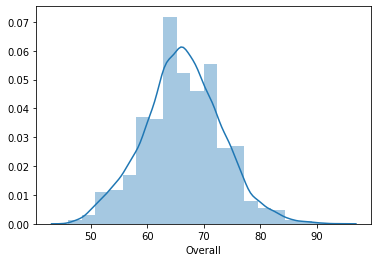

In [44]:
sns.distplot(data['Overall'] , bins = 20)

In [81]:
data['Overall'].skew()

0.06294806520950566

## 2. Generate pair plots for the following variables

In [45]:
cln = ['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']

In [46]:
data1.dtypes

ID                                   int64
Name                                object
Age                                  int64
Nationality                         object
Overall                              int64
Potential                            int64
Club                                object
Value                              float64
Wage                               float64
Preferred Foot                      object
International Reputation           float64
Weak Foot                          float64
Skill Moves                        float64
Work Rate                           object
Body Type                           object
Position                            object
Joined                             float64
Loaned From                         object
Contract Valid Until        datetime64[ns]
Height                              object
Weight                              object
Crossing                           float64
Finishing                          float64
HeadingAccu

In [47]:
data1.loc[:,cln].dtypes ### only overall , height , international reputation seems to be plotable rest all are in string format

Overall                       int64
Value                       float64
Wage                        float64
International Reputation    float64
Height                       object
Weight                       object
Release Clause               object
dtype: object

In [48]:
cln1 = ['Overall' ,'International Reputation' , 'Height']

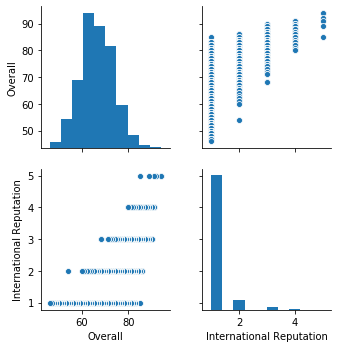

In [49]:
sns.pairplot(data = data1.loc[:,cln1])

## 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
## a)	What would the average wage for this set of players be?
## b)	What is the average age?
## c)	Is there a correlation between the Overall rating and Value for these players?


In [50]:
top_20 = data1.loc[(data1['Contract Valid Until'] == 2020)].sort_values(by ='Overall' ,ascending = False ).head(20)
top_20      

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [51]:
top_20 = data1.query('`Contract Valid Until` == 2020').sort_values(by='Overall',ascending=False).head(20)
top_20 ### different menthod

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,€111M
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,€141.5M
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,€44.4M
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,€76.5M


###  average wage

In [52]:

top_20['Wage'].mean()

205450.0

### average  Age

In [53]:
top_20['Age'].mean() # average of top 20 players

30.65

In [54]:
int(data['Age'].mean())

25

### correlation between the Overall rating and Value for these players

In [55]:
top_20['Overall'].corr(top_20['Value'])

0.7867166042074152

## 4.	Generate tables containing the top 5 players by Overall rating for each unique position.

In [56]:
top_20.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [57]:
data1.dropna(subset = ['Position'] ,inplace = True)

In [58]:
data1['Position'].isnull().sum()

0

In [59]:
top_5 = data1.groupby('Position')['Position' , 'Overall'].head(5)

In [60]:
top_5.sort_values(['Position' , 'Overall'] , ascending = [True ,False])

,Position,Overall
17,CAM,89
31,CAM,88
61,CAM,86
66,CAM,86
74,CAM,86
...,...,...
1,ST,94
10,ST,90
16,ST,89
23,ST,89


#### a)	Are there any players appearing in more than one Table. Please point out such players.

In [80]:
names = data1['Name'].value_counts()
b = pd.DataFrame(names[names>1])
b.reset_index().rename({'index':'Name' , 'Name':'Count'}, axis= 1)

,Name,Count
0,J. Rodríguez,11
1,Paulinho,8
2,J. Williams,7
3,R. Williams,7
4,J. Hernández,6
...,...,...
752,A. Costa,2
753,Otávio,2
754,E. Valencia,2
755,A. Soumaoro,2


#### b)	What is the average wage one can expect to pay for the top 5 in every position?

In [66]:
data1 = data1.sort_values('Overall')
avg_top5 = data1.groupby('Position')
c = pd.DataFrame(avg_top5['Wage'].mean())
c

,Wage
Position,
CAM,10229.645094
CB,7704.724409
CDM,9315.400844
CF,10216.216216
CM,8340.746055
GK,6803.950617
LAM,26142.857143
LB,8726.928896
LCB,11498.456790


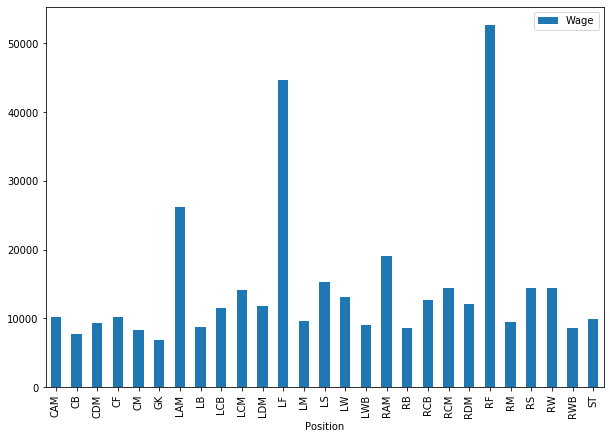

In [75]:
c.plot(kind = 'bar' , figsize = [10,7])

In [ ]:
### another way to find

In [391]:
data2 = pd.pivot_table(data1, columns =['Position' , 'Wage' ,'Overall'] )

In [392]:
data2

            Position  Wage      Overall
ID          CAM       0.0       59         242955.0
                                64         202207.0
                                65         245978.0
                                68         226568.0
                                70         241234.0
                                             ...   
GKReflexes  ST        230000.0  87             10.0
                      240000.0  85              7.0
                      300000.0  89             14.0
                      355000.0  88              6.0
                      405000.0  94             11.0
Length: 250174, dtype: float64

In [409]:
data1 = data1.sort_values( ['Overall'] , ascending = False)

In [410]:
data3 = data.groupby('Position')['Overall'].head(5)

In [411]:
data3

0       94
1       94
2       92
3       91
4       91
        ..
1705    75
2342    74
2330    74
2322    74
2247    74
Name: Overall, Length: 135, dtype: int64